In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [141]:
plt.style.available # plt.style.use('style_of_choice') to change to a style of choice

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

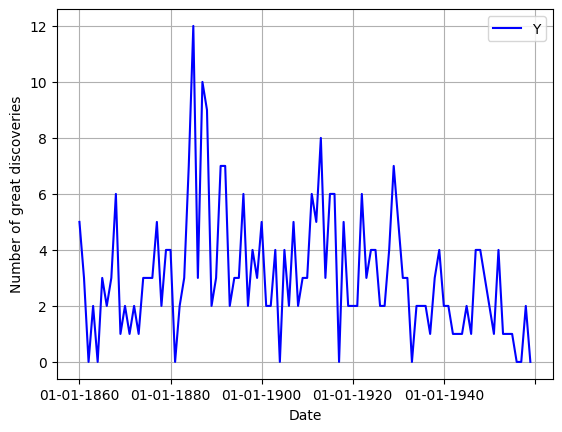

In [142]:
#import data
discoveries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ch1_discoveries.csv')

# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue', grid=True)

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

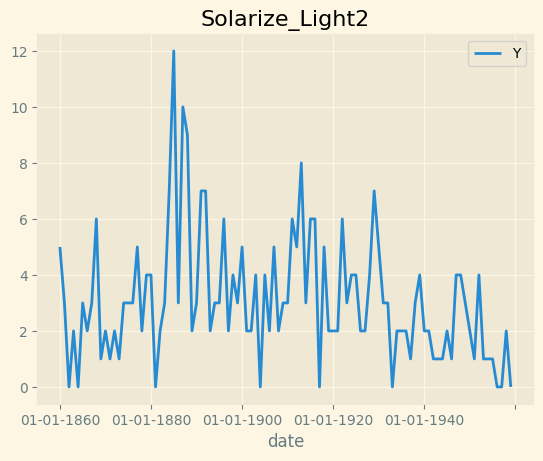

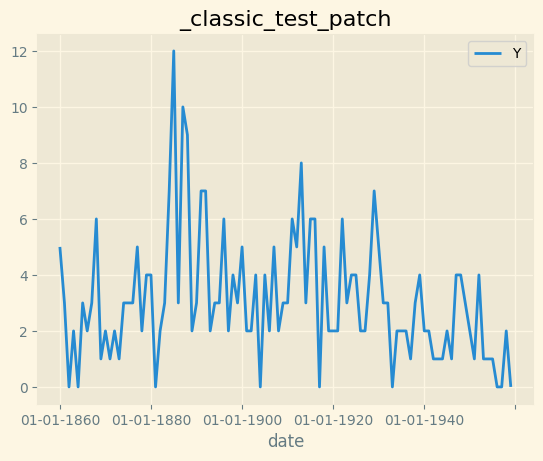

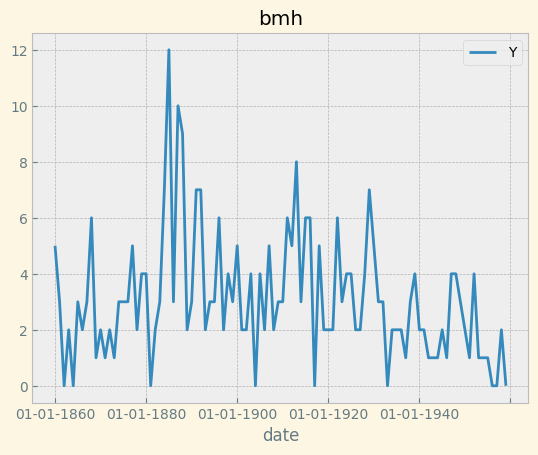

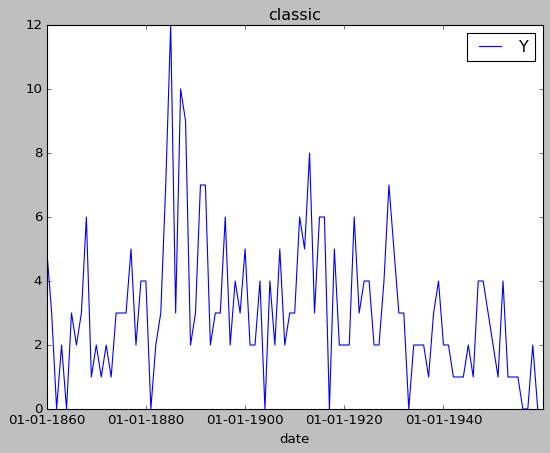

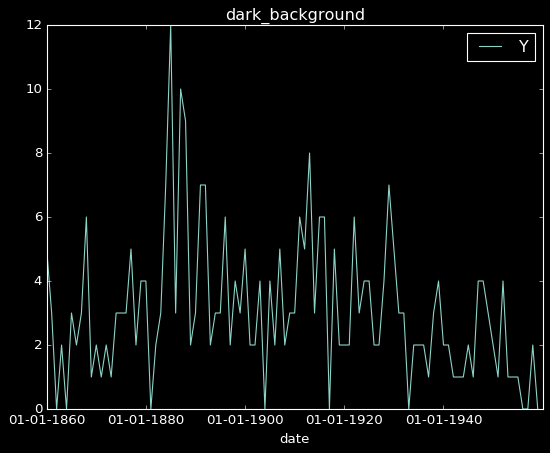

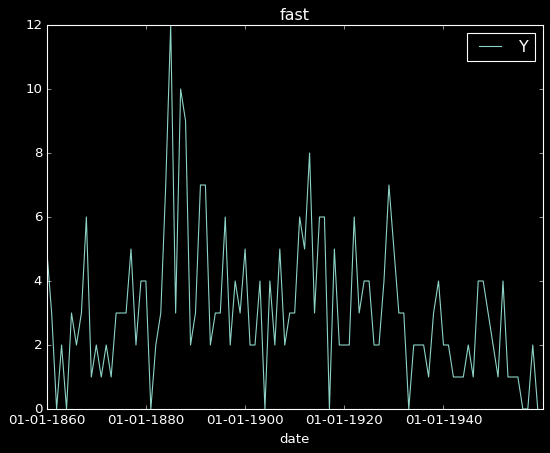

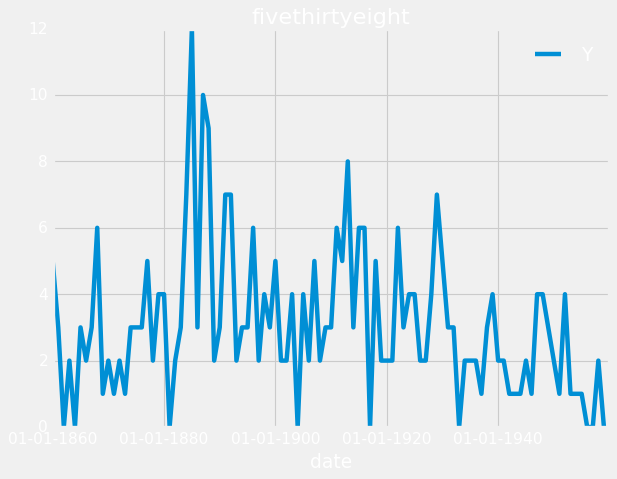

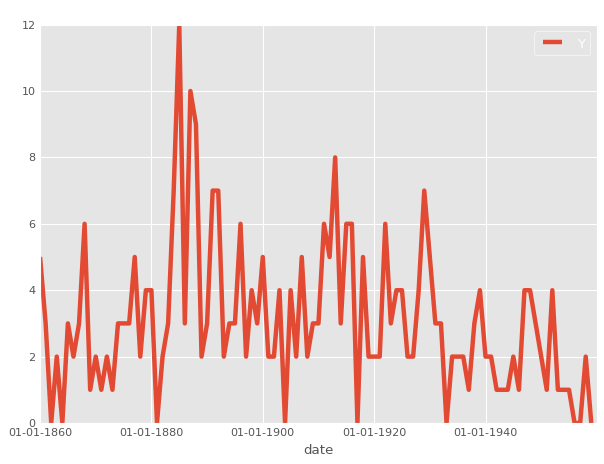

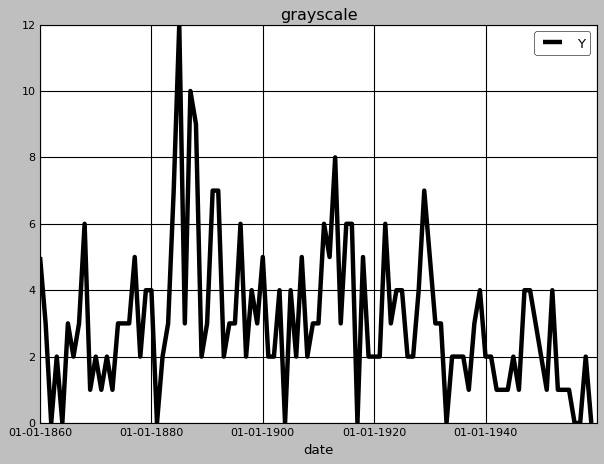

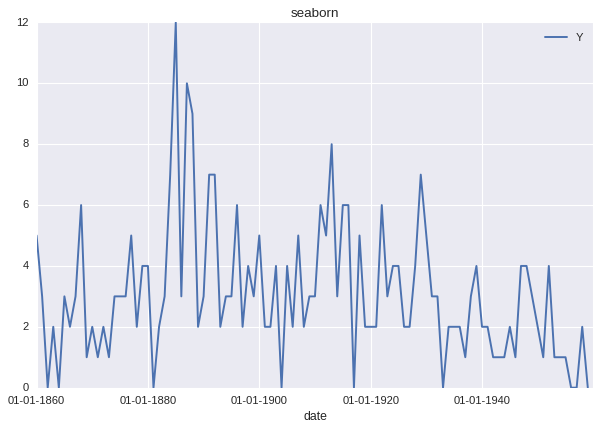

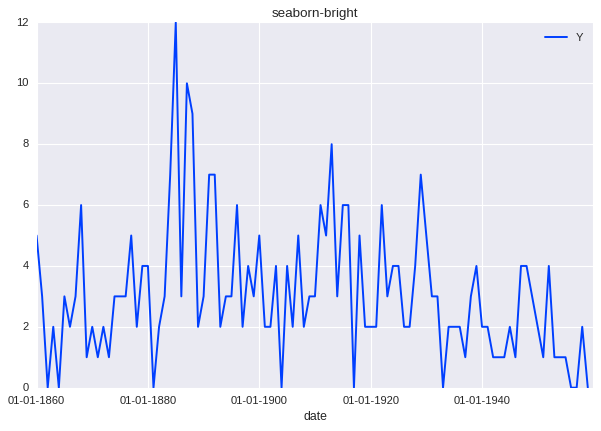

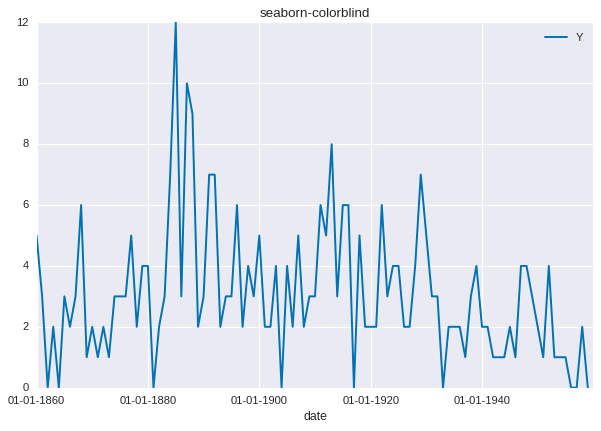

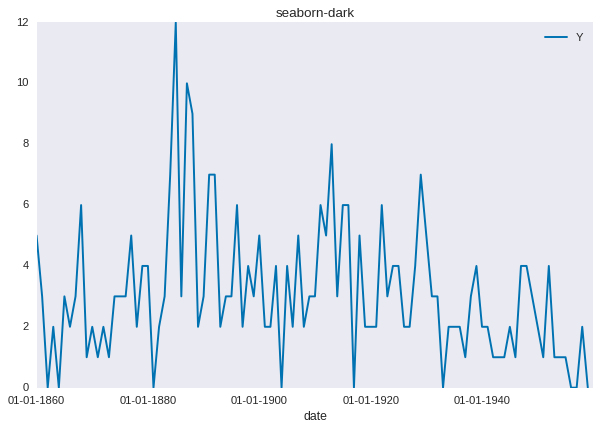

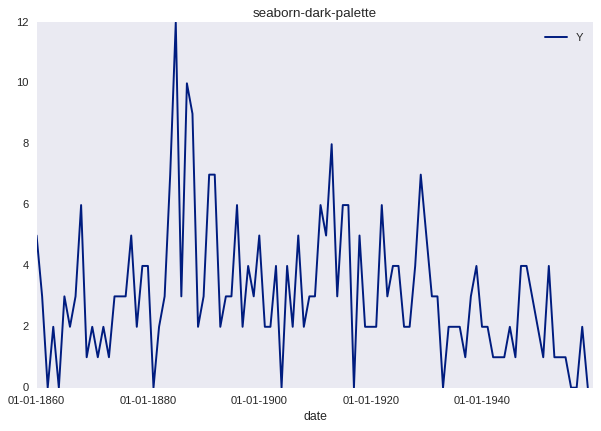

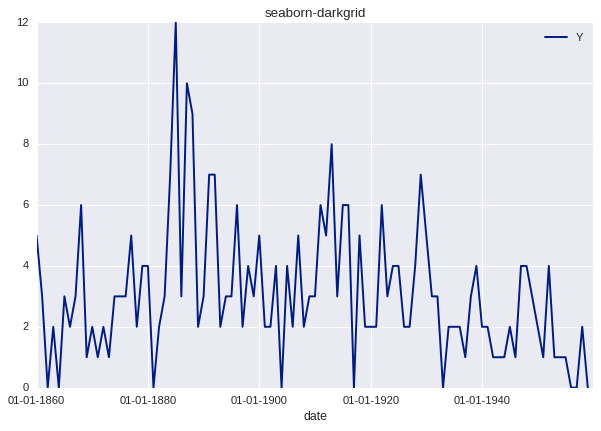

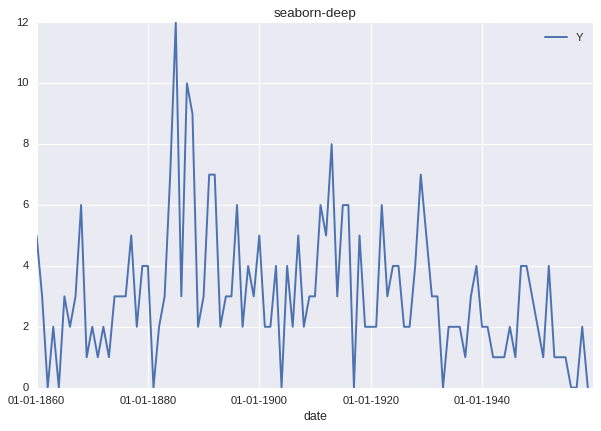

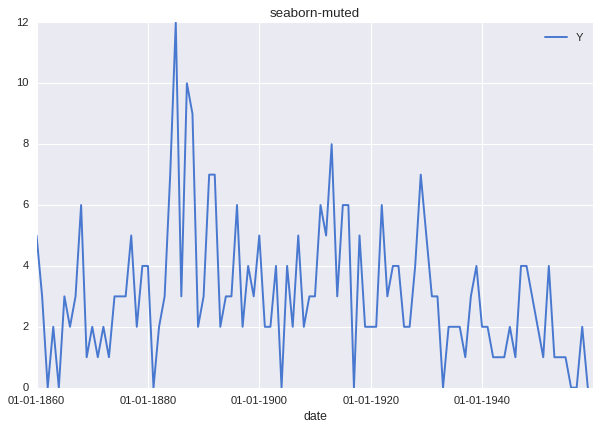

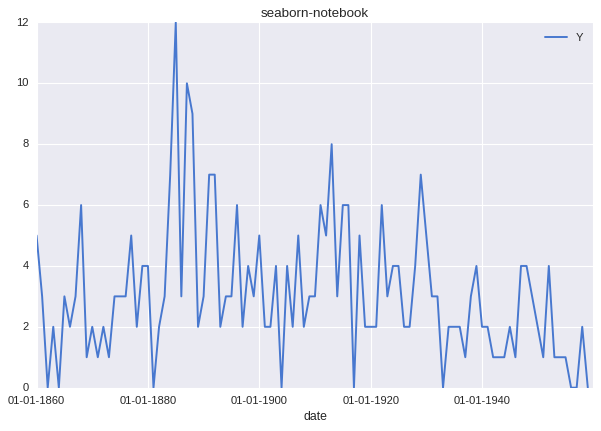

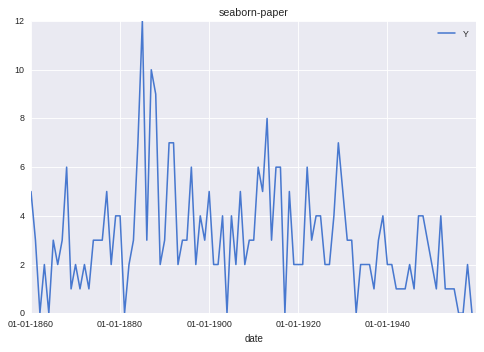

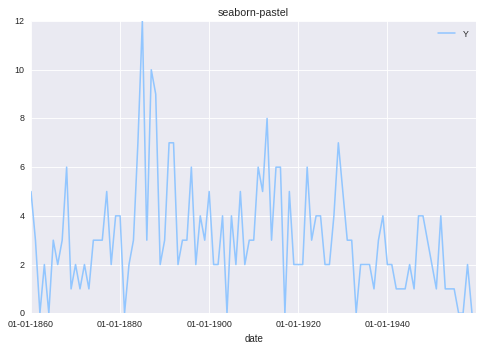

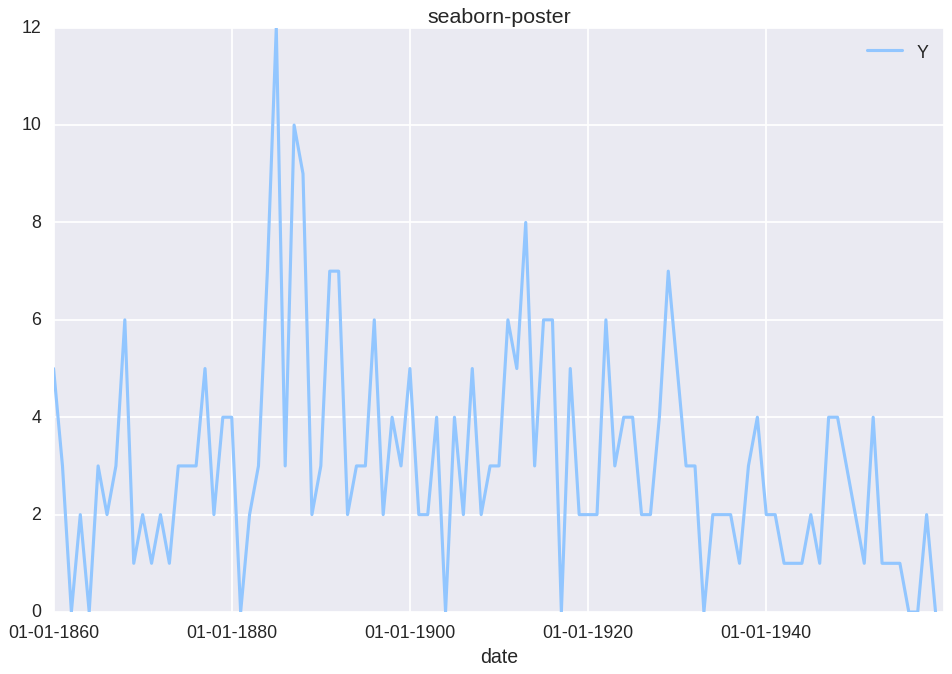

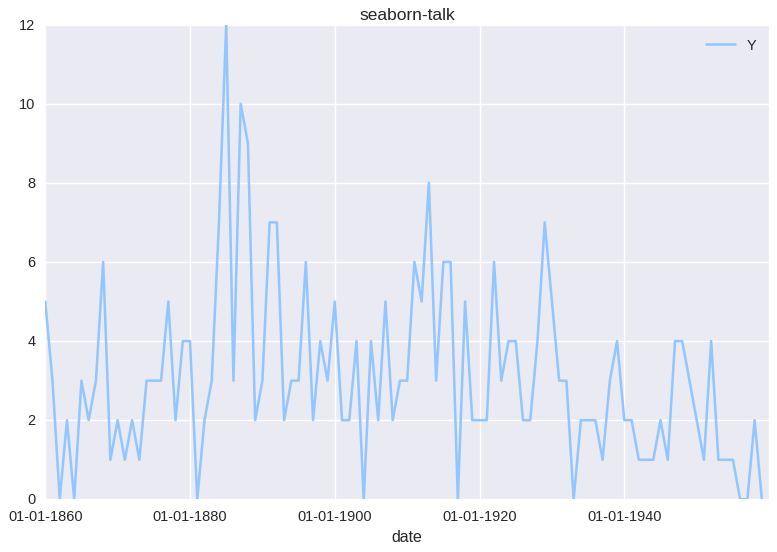

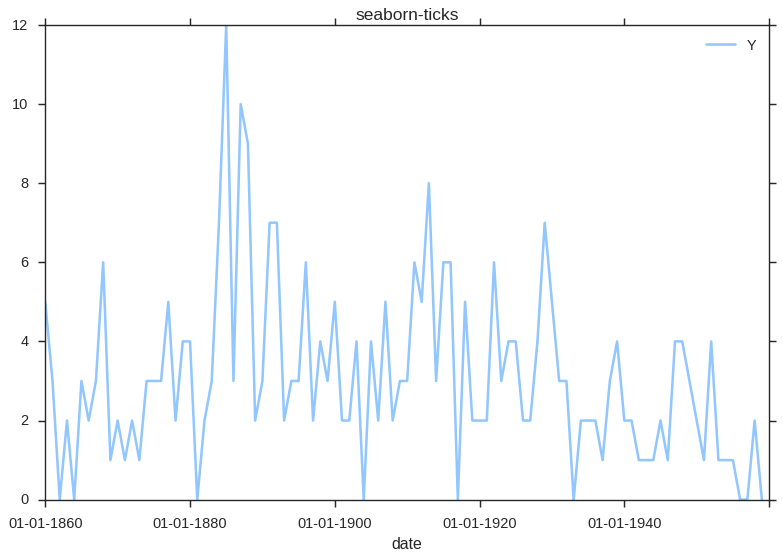

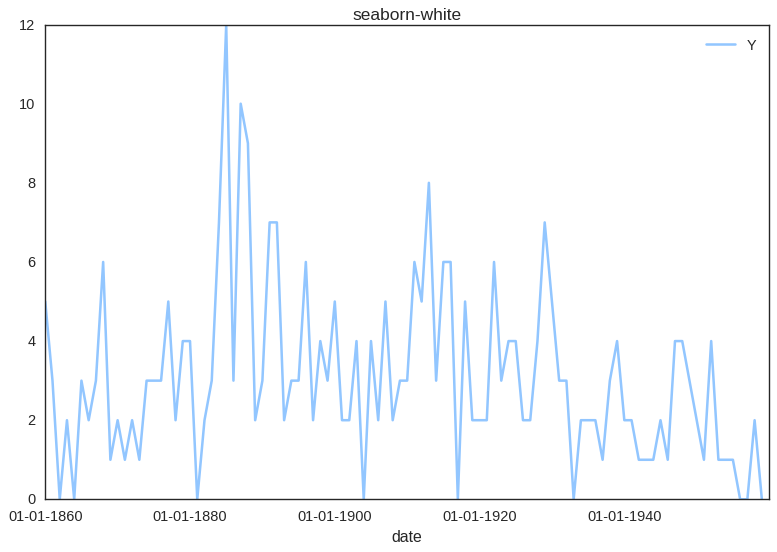

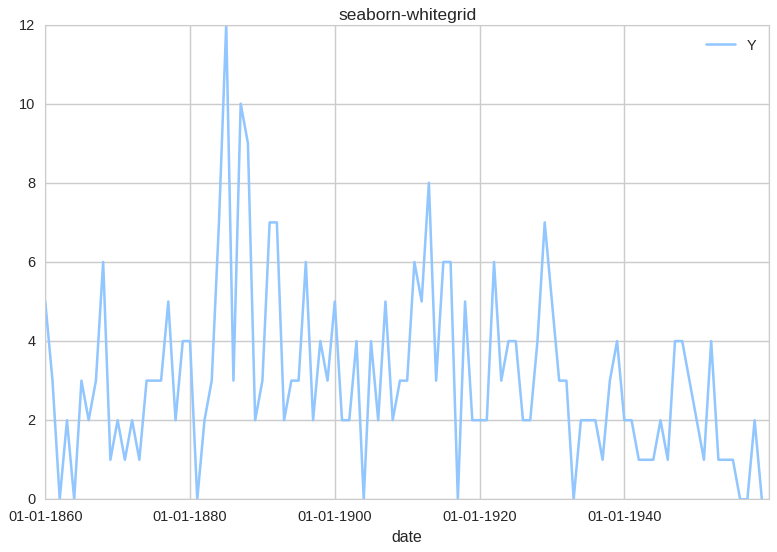

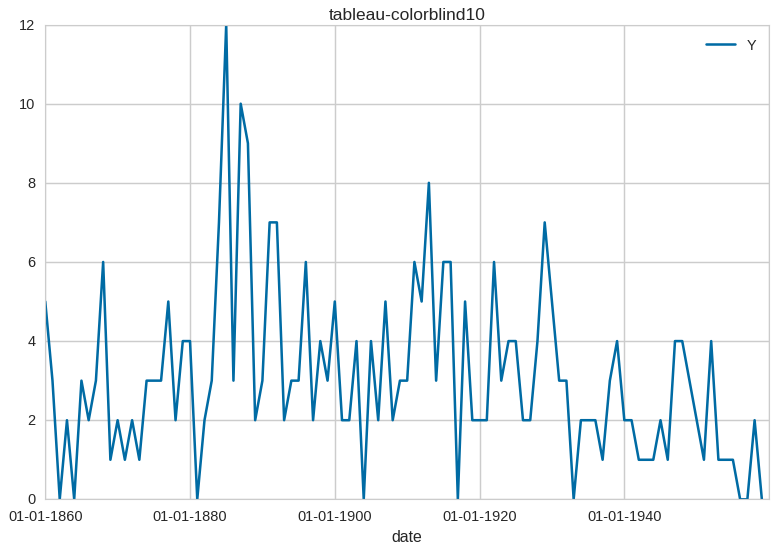

In [143]:
for elem in plt.style.available:
  plt.style.use(f'{elem}')
  ax1 = discoveries.plot()
  ax1.set_title(f'{elem}')
  plt.show()

In [144]:
# Reformat the date index
discoveries.index = pd.to_datetime(discoveries.index).year
discoveries

,Y
date,
1860,5
1861,3
1862,0
1863,2
1864,0
...,...
1955,1
1956,0
1957,0


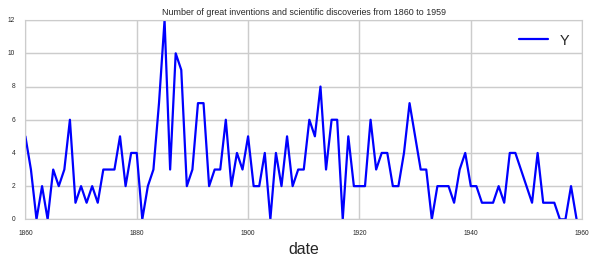

In [145]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

In [146]:
discoveries.index = pd.to_datetime(discoveries.index, format='%Y')
discoveries

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0
...,...
1955-01-01,1
1956-01-01,0
1957-01-01,0


In [147]:
plt.style.use('default')

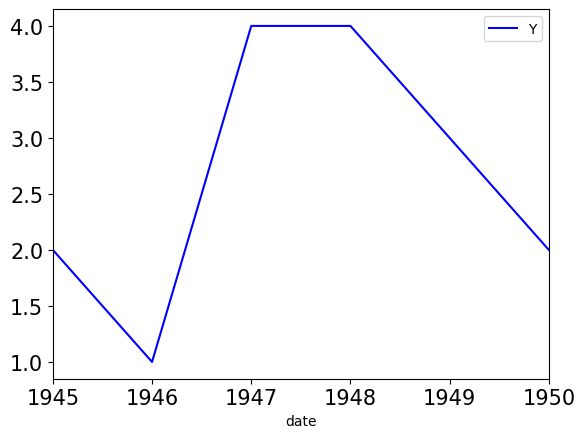

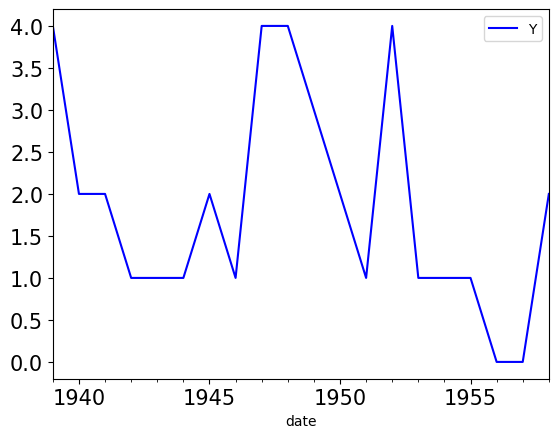

In [148]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show();

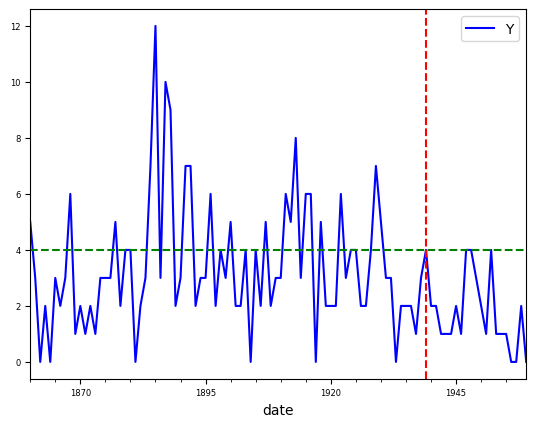

In [149]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

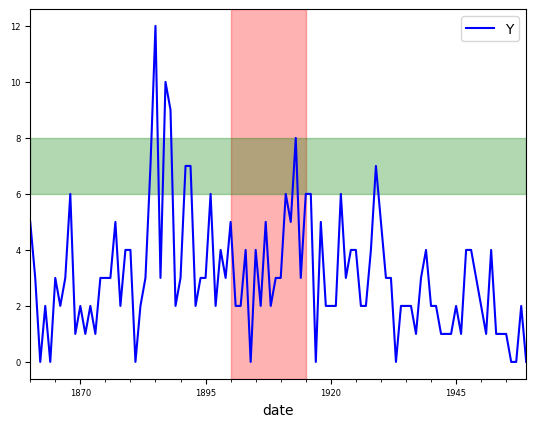

In [150]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

In [151]:
co2_levels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ch2_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
co2_levels

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


In [152]:
co2_levels.isna().sum()

co2    59
dtype: int64

In [153]:
co2_levels = co2_levels.fillna(method='bfill')

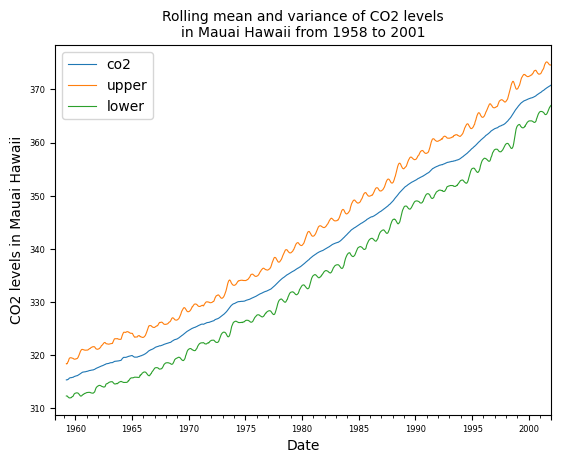

In [154]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

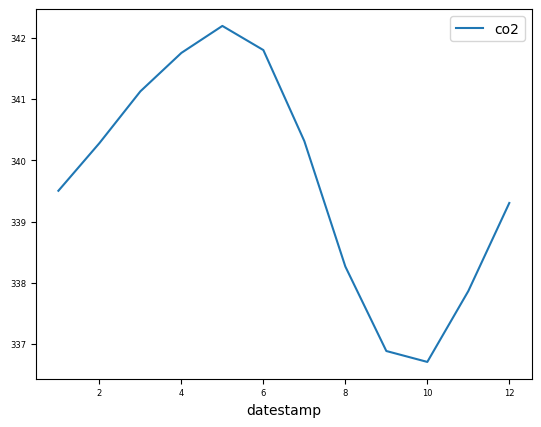

In [155]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

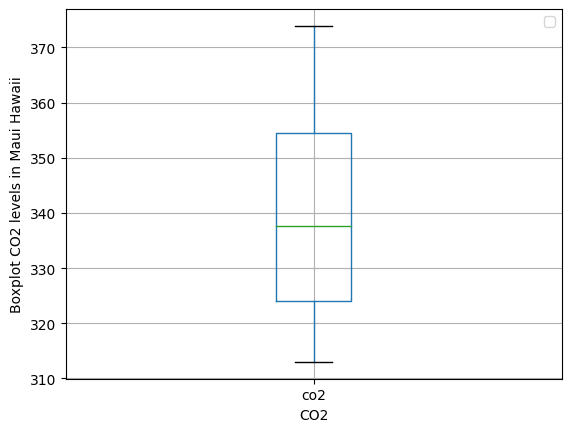

In [156]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

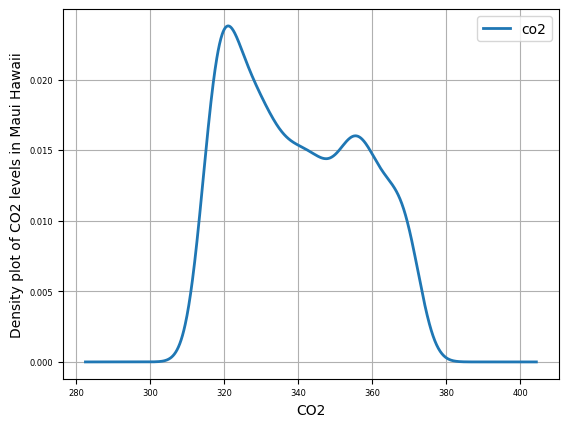

In [157]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=2, grid=True, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

**Autocorrelation in time Series data**

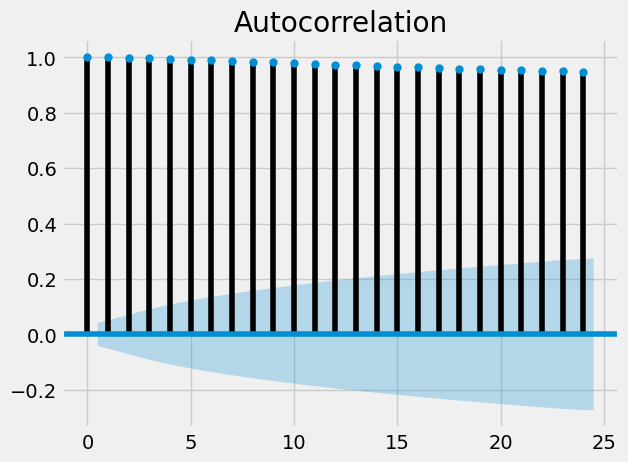

In [158]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

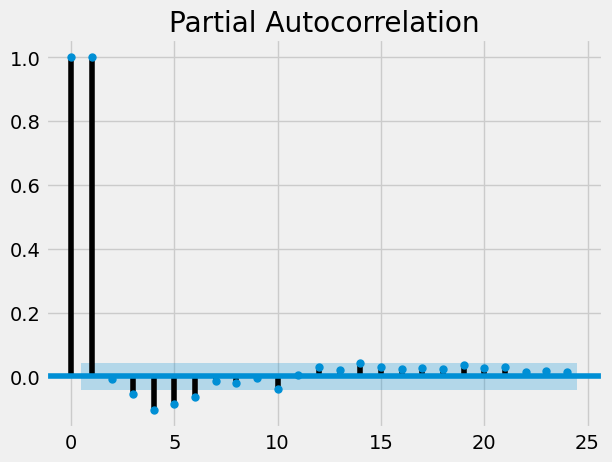

In [159]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

**Seasonality, Trend and Noise**

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


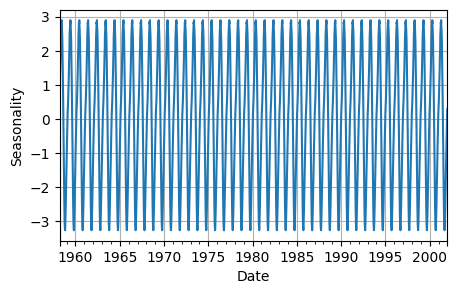

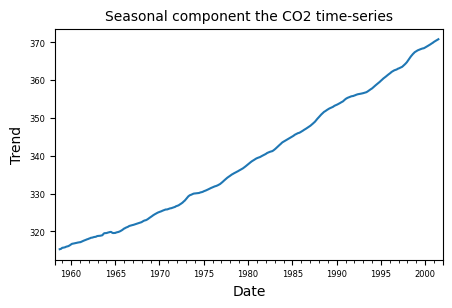

In [160]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

# Plot the seasonality
plt.style.use('default')
ax = decomposition.seasonal.plot(figsize=(5, 3), grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality')
plt.show()

# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(5, 3), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Trend')
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [161]:
airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ch3_airline_passengers.csv', parse_dates=['Month'], index_col='Month')
airline

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [162]:
# Print out the number of missing values
print(airline.isna().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


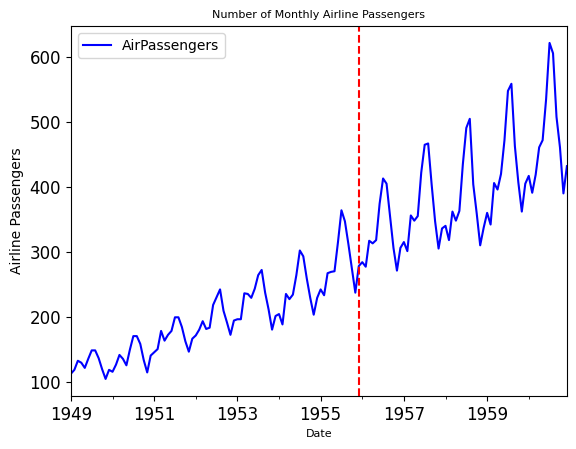

In [163]:
# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=8)
ax.set_ylabel('Airline Passengers')
ax.set_title('Number of Monthly Airline Passengers', fontsize=8)
plt.show()

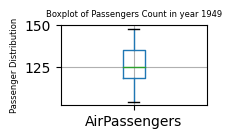

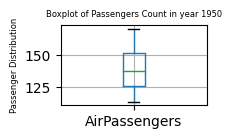

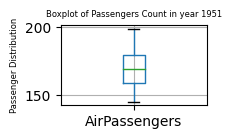

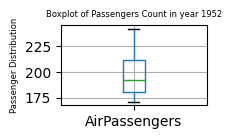

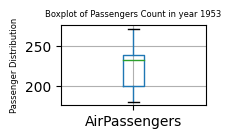

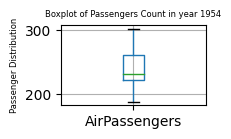

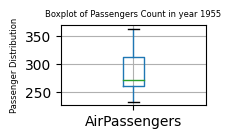

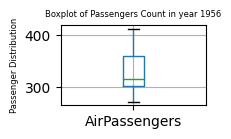

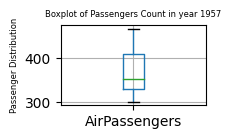

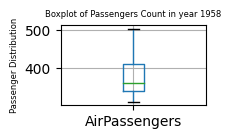

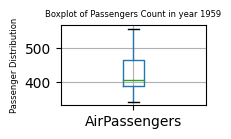

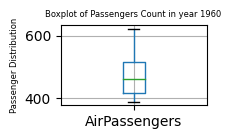

In [164]:
lst = sorted(list(set(airline.index.year)))

if len(lst) % 3 == 1:
  num = int(len(lst)/3) + 1
else:
  num = len(lst)/3

for i,year in enumerate(lst):
  plt.subplot(num,3,i+1)
  ax = airline.loc[f'{year}'].boxplot(figsize=(5, 3))
  ax.set_ylabel('Passenger Distribution', fontsize=6)
  ax.set_title(f'Boxplot of Passengers Count in year {year}', fontsize=6)
  plt.show();

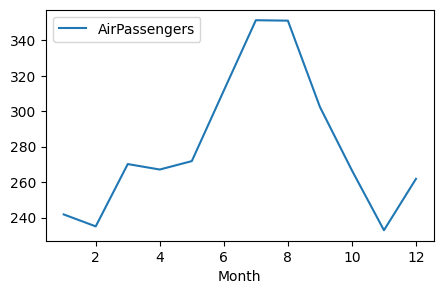

In [165]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot(figsize=(5,3))
plt.legend(fontsize=10)
plt.show()

In [166]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Make a new dataframe to hold trend and seasonal data
airline_decomposed = pd.DataFrame()
airline_decomposed.index = airline.index

# Extract the trend and seasonal components
airline_decomposed['trend'] = decomposition.trend
airline_decomposed['seasonal'] = decomposition.seasonal

airline_decomposed.head()

,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313


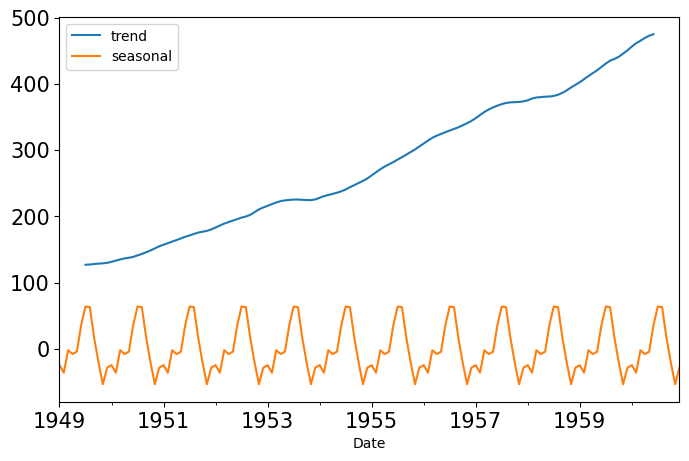

In [167]:
# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(8, 5), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [168]:
# Read in meat DataFrame
meat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ch4_meat.csv', parse_dates=['date'], index_col='date')

# Review the first five lines of the meat DataFrame
meat.head(5)

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [169]:
# Print the summary statistics of the DataFrame
meat.describe()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


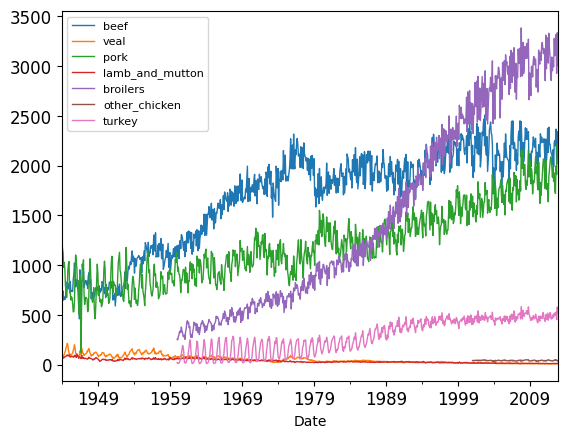

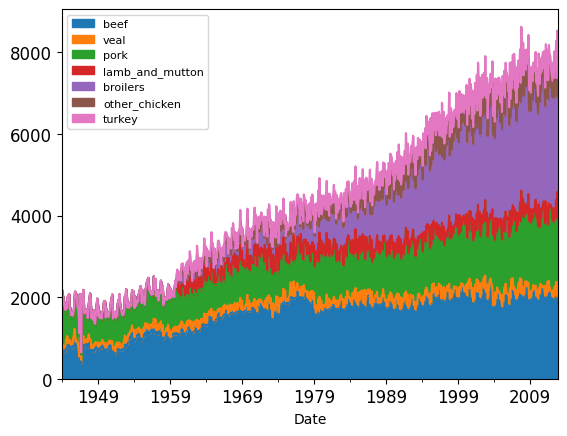

In [170]:
# Plot time series dataset
ax = meat.plot(linewidth=1, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=8)

# Show plot
plt.show()

# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=8)

# Show plot
plt.show()

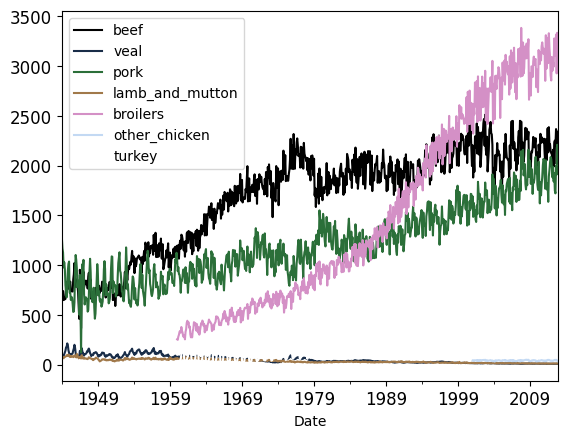

In [173]:
# Plot time series dataset using the cubehelix color palette
# see https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html for full color reference
ax = meat.plot(colormap='cubehelix', fontsize=12) 

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

In [178]:
meat_mean = meat.describe().loc['mean',].to_frame().T
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


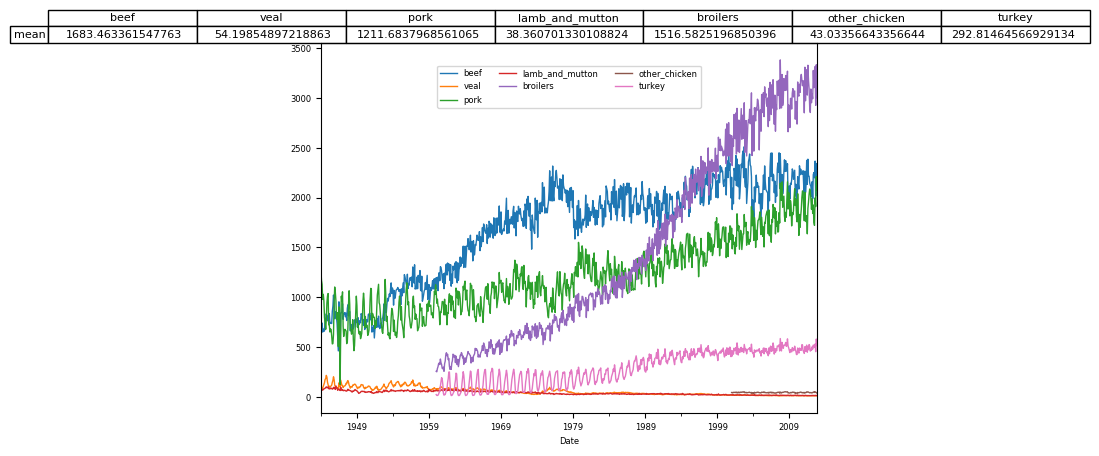

In [181]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.3]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

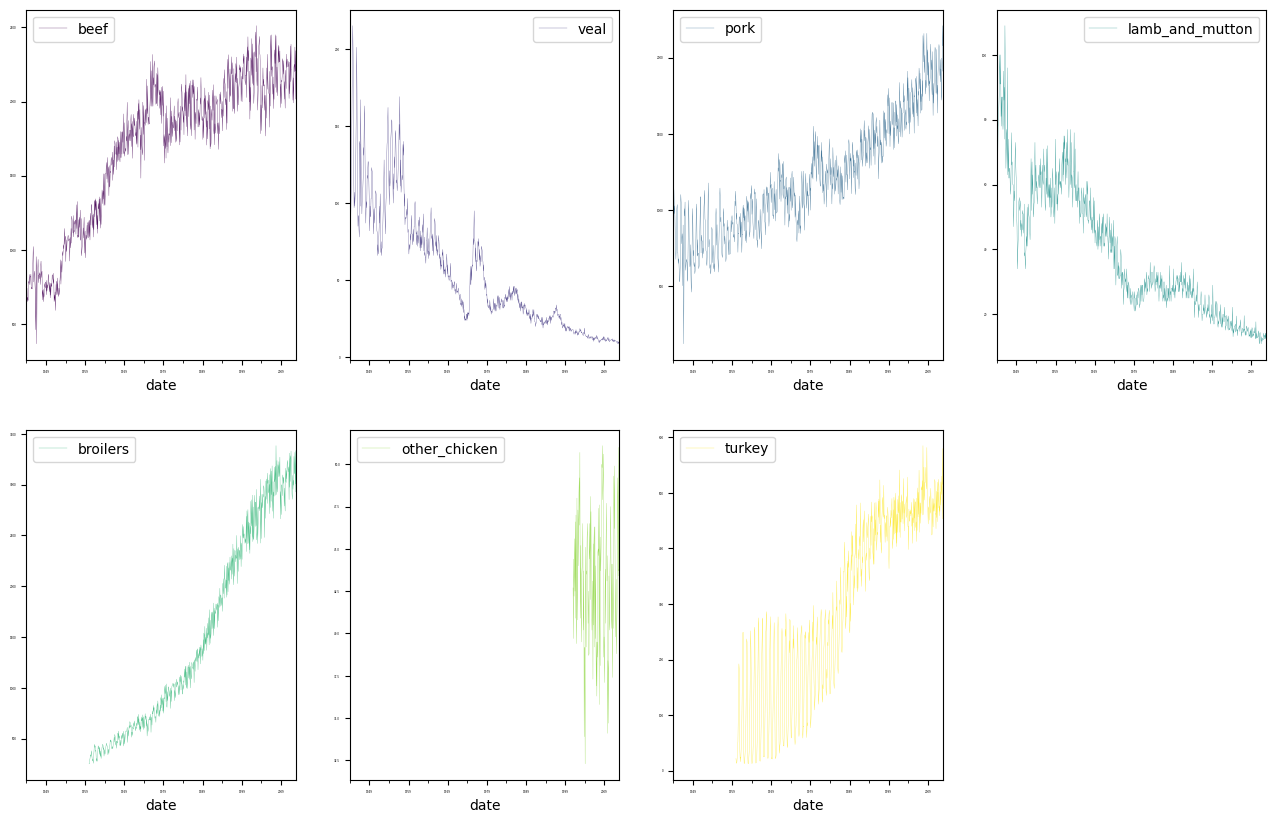

In [191]:
# Create a facetted graph with 2 rows and 4 columns
ax = meat.plot(subplots=True, 
               layout=(2, 4), 
               sharex=False, 
               sharey=False, 
               colormap='viridis',
               figsize=(16, 10), 
               fontsize=2, 
               legend=True, 
               linewidth=0.2)

#ax.legend(fontsize=4)
plt.show()

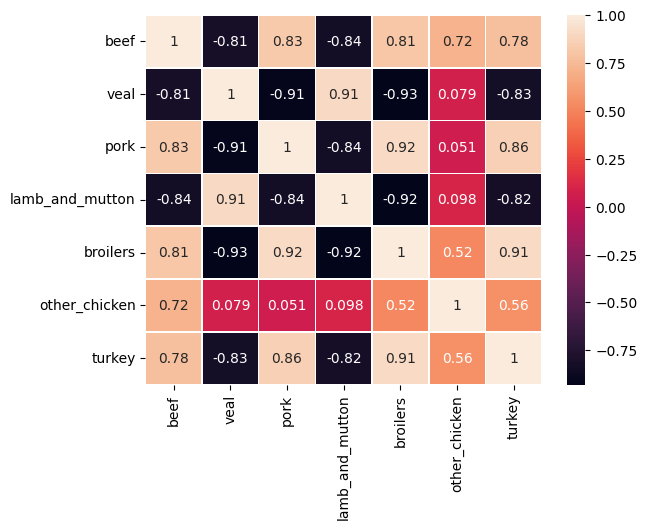

In [193]:
# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

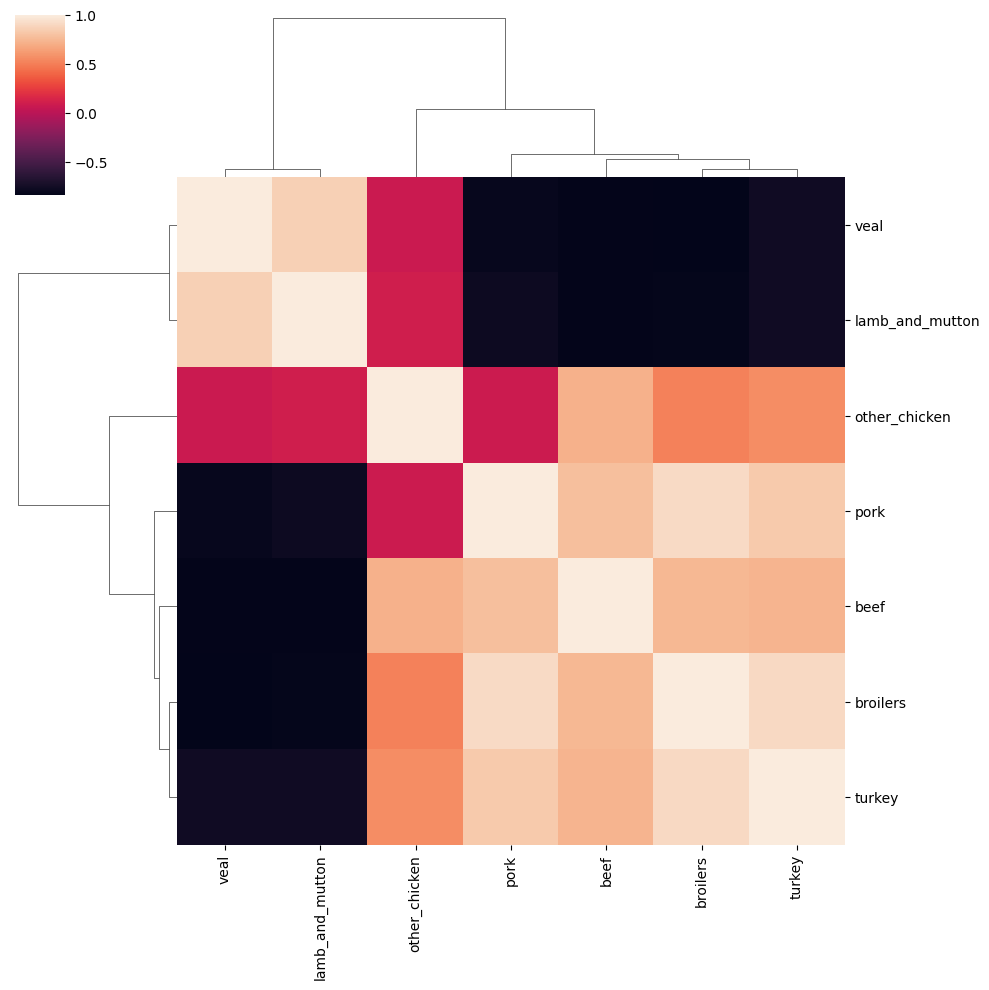

In [194]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()